# DESCRIPTIVE STATISTICS OF THE TRIBUNAL DECISIONS (20th November 2021)

This notebook extracts additional information from the text of the tribunal decisions and stores it in the relevant dictionary.

In particular, the notebook performs information extraction on:

1. The label included in the name of the file.

2. The court where the case was heard ("Heard at").

3. The judges.

4. The legal representation for the appellant and the respondent.

5. The decision/ruling by the judge.

Each of these filds is added to the dictionary of each judicial decision.

The resulting data set - a list of updated dictionaries -  is serialised as a json object (jsonDataFinal.json).

This notebook should run in the tfm environment, which can be created with the environment.yml file.

In [10]:
import ipykernel
from os import listdir
from os.path import isfile, join, getsize
import numpy as np
import time
import re
import json
import pickle
import pandas as pd
import sys
import datetime
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

import sys
IN_COLAB = 'google.colab' in sys.modules


# What environment am I using?
print(f'Current environment: {sys.executable}')

# Change the current working directory
os.chdir('/Users/albertamurgopacheco/Documents/GitHub/TFM')
# What's my working directory?
print(f'Current working directory: {os.getcwd()}')


Current environment: /Users/albertamurgopacheco/anaconda3/envs/tfm/bin/python
Current working directory: /Users/albertamurgopacheco/Documents/GitHub/TFM


In [3]:
# Define working directories in colab and local execution

if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/gdrive')
    docs_path = '/content/gdrive/MyDrive/TFM/data/raw'
    input_path = '/content/gdrive/MyDrive/TFM'
    output_path = '/content/gdrive/MyDrive/TFM/output'

else:
    docs_path = './data/raw'
    input_path = '.'
    output_path = './output'

# DESCRIPTIVE STATISTICS OF THE TRIBUNAL DECISIONS

# 1. Build a dataframe with the needed fields

There are two categories of cases: the reported and the unreported ones. The reported cases include richer data while the unreported ones (the vast majority of cases) miss several data fields due to a request for annonimity from any of the parties involved in the legal dispute.

The first two letters in the file name seem to follow some logic. Inspecting the documents reveals the following meanings:

In [13]:


# Loop over each text file and extract Court information
for decision in tqdm(data):
    # Obtain the full text of the court decision
    string = decision.get('Decision:')
    #file_name = decision.get('File')
    if isinstance(string, float):
        continue
    else:
        # If a label has not been found (flag = 0)
        flag = 0
        # The decisions are stored as a listt of tokens. Use plain text.
        string = ' '.join(x for x in string)

100%|██████████| 35308/35308 [00:00<00:00, 595181.58it/s]


In [4]:

# Open jsonData file as data
with open('./data/jsonDataFinal.json') as json_file:
    data = json.load(json_file)
    
df = pd.DataFrame(data)

# 2. Generate statistics on the fields

An inspection of a sample of judicial decisions reveals that the name of the court is located in the first part of the document and it usually follows the expression "Heard at".

The strategy to capture this field will consist of a search using regular expressions. 

In [7]:
# Fields in the database
df.keys()

Index(['Case title:', 'Appellant name:', 'Status of case:', 'Hearing date:',
       'Promulgation date:', 'Publication date:', 'Last updated on:',
       'Country:', 'Judges:', 'Document', 'Reference', 'Download', 'File',
       'String', 'ID', 'Code label:', 'Heard at:', 'Decision:', 'Nationality:',
       'Representation:', 'Appellant:', 'Respondent:', 'Decision label:',
       'Appellant entity:', 'Respondent entity:', 'Keywords',
       'Country guidance:', 'Case Notes:', 'Categories:'],
      dtype='object')

In [ ]:
# TO DO
# Count complete sets (rulings with all relevant fields completed)
# Generate year field
# Count sentences per year
# 


print(data[10481])

# 3. Charts



In [8]:
df.describe()




,Case title:,Appellant name:,Status of case:,Hearing date:,Promulgation date:,Publication date:,Last updated on:,Country:,Judges:,Document,...,Representation:,Appellant:,Respondent:,Decision label:,Appellant entity:,Respondent entity:,Keywords,Country guidance:,Case Notes:,Categories:
count,35305,35305,35305,35305,35305,35305,35305,34292,35305,35305,...,31933,31933,31933,30085,23006,27283,2173,378,250,46
unique,2138,1158,2,3038,3048,2189,1773,214,2672,35305,...,30550,17626,8486,3,3876,2008,1992,1,120,5
top,,,Unreported,,21 Dec 2015,,26 Nov 2013,,[Macleman],https://moj-tribunals-documents-prod.s3.amazon...,...,"[for, the, appellant, in, person]",no appearance,mr p duffy senior home office presenting officer,Accepted,Home Office,Home Office,IJR,Yes,This determination was removed from the Countr...,
freq,33165,33165,33165,1756,73,511,2544,12000,936,1,...,35,423,550,13711,6748,22363,75,378,17,42


              String
count   35270.000000
mean     2512.161270
std      3266.652624
min         0.000000
25%      1079.000000
50%      1798.000000
75%      2903.000000
max    125522.000000


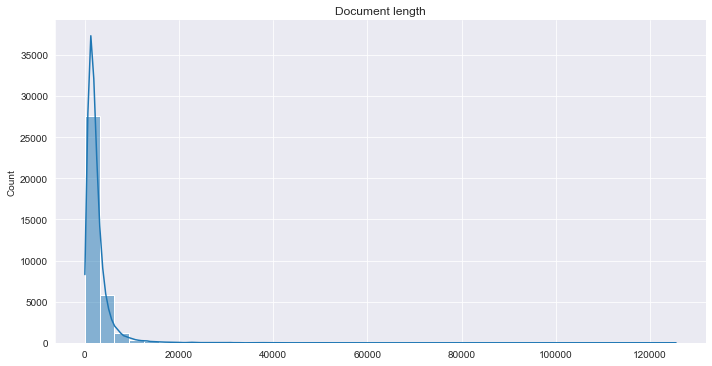

In [11]:
# Original texts deleting duplicated issues
orig_texts = df['String'].unique().tolist()

# Issue field length count statisticals values and histogram with KDE
document_lengths = [len(re.findall(r'\b([a-zA-Z]+n\'t|[a-zA-Z]+\'s|[a-zA-Z]+)\b', x)) for x in orig_texts]

print(pd.DataFrame(document_lengths, columns = ['String']).describe())

sns.set_style(style="darkgrid")

sns.displot(document_lengths, kde = True, bins = 40, height = 5, aspect = 2)
plt.title('Document length')

          Decision:
count  3.527000e+04
mean   1.785578e+04
std    2.448509e+04
min    5.000000e+00
25%    7.877250e+03
50%    1.273000e+04
75%    2.030275e+04
max    1.249939e+06


Text(0.5, 1.0, 'Decision length')

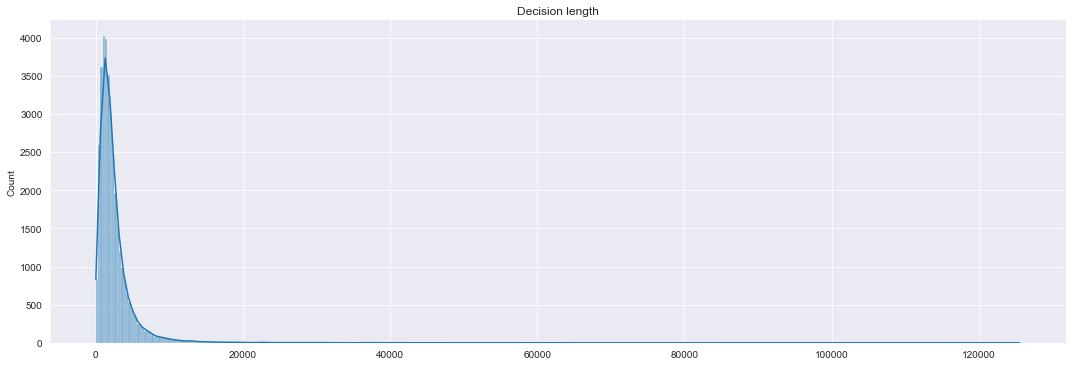

In [20]:
# Original texts deleting duplicated issues
orig_decisions = df['Decision:'].tolist()

# Issue field length count statisticals values and histogram with KDE
decision_lengths = [len(x) for x in orig_texts]

print(pd.DataFrame(decision_lengths, columns = ['Decision:']).describe())

sns.set_style(style="darkgrid")

sns.displot(document_lengths, kde = True, bins = 400, height = 5, aspect = 3)
plt.title('Decision length')
